In [1]:
# ! pip install nmslib pandas torch requests streamlit
# ! conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
# ! pip install ftfy regex tqdm
# ! pip install git+https://github.com/openai/CLIP.git
# pip install googletrans==3.1.0a0

In [2]:
import os
import numpy as np
from nmslib_indexer import HnmsIndexer
import os
import glob
import numpy as np
from IPython.display import Image
import requests
imgs = sorted(glob.glob('frames/*'))

def show_img(i, imgs):
    return Image(filename=imgs[i])

files = sorted(glob.glob('frame_vectors/*'))
embs = np.vstack([np.load(x) for x in files])

indexer_path = 'indexer'
indexer = HnmsIndexer()

if not os.path.exists(indexer_path):
    indexer.add(embs)
    indexer.save(indexer_path)
    print('saved indexer')
else:
    indexer.load(indexer_path)
    print('loaded indexer')

def search_video(query):
    return 'videos/hb_nd_cv2.mp4'

loaded indexer


In [3]:
indexer.find(embs[-2], 4)

(array([0.6112617], dtype=float32), array([0], dtype=int32))

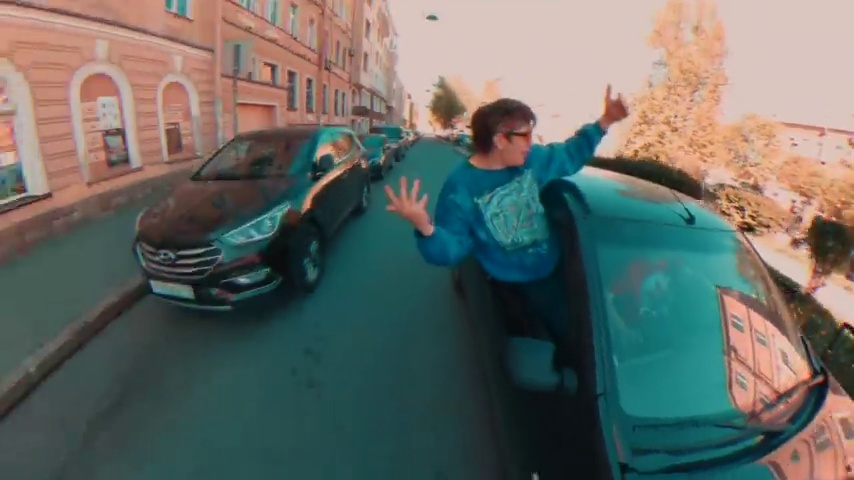

In [4]:
import os
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

def encode_text(predictor, text: str) -> np.ndarray:
    with torch.no_grad():
        text_latent = predictor.encode_text(clip.tokenize(text).to('cpu'))
        text_latent /= text_latent.norm(dim=-1, keepdim=True)
    return text_latent.cpu().detach().numpy()

text_ebm = [encode_text(model, 'car')]
indexer.find(text_ebm, 4)
show_img(183, imgs)

In [ ]:
# ! wget http://moments.csail.mit.edu/splits/Moments_in_Time_Raw_v2.zip -OMoments_in_Time_Raw_v2

In [5]:
import pandas as pd
df = pd.read_csv('data/results_10M_val.csv')
df.head()

,videoid,contentUrl,duration,page_dir,name
0,1023443014,https://ak.picdn.net/shutterstock/videos/10234...,PT00H00M30S,095201_095250,Disco light leaks disco ball light reflections...
1,1026421895,https://ak.picdn.net/shutterstock/videos/10264...,PT00H00M05S,199401_199450,Valle de la luna / san pedro de atacama / chil...
2,4350377,https://ak.picdn.net/shutterstock/videos/43503...,PT00H00M09S,137551_137600,Cloudy moscow kremlin time lapse
3,1054633538,https://ak.picdn.net/shutterstock/videos/10546...,PT00H00M19S,083701_083750,Sharp knife to cut delicious smoked fish
4,15702931,https://ak.picdn.net/shutterstock/videos/15702...,PT00H00M05S,138451_138500,The girl received flowers as a gift. a gift fo...


In [6]:
df['contentUrl'].values[1]

'https://ak.picdn.net/shutterstock/videos/1026421895/preview/stock-footage-valle-de-la-luna-san-pedro-de-atacama-chile-pull-focus-desert-and-salt.mp4'

In [7]:
from IPython.display import Video

def download_video_series(link, odir):
    os.makedirs(odir, exist_ok=True)
    file_name =  odir + '/' + link.split('/')[-1] 
    print( "downloading file:", file_name) 
    r = requests.get(link, stream = True) 
    with open(file_name, 'wb') as f: 
        for chunk in r.iter_content(chunk_size = 1024*1024): 
            if chunk: 
                f.write(chunk) 
    print('downloaded', file_name)
    return file_name
    
file_name = download_video_series(df['contentUrl'].values[0], 'downloaded')
Video(file_name)

downloading file: downloaded/stock-footage-disco-light-leaks-disco-ball-light-reflections-shaped-rectangular-and-line-with-motion-blur-effect.mp4
downloaded downloaded/stock-footage-disco-light-leaks-disco-ball-light-reflections-shaped-rectangular-and-line-with-motion-blur-effect.mp4


In [15]:
from googletrans import Translator

text = 'ехала Маша на машине сar'
translator = Translator()
text_translated = translator.translate(text, src = 'ru', dest='en').text
print(text, text_translated)

ехала Маша на машине сar Masha was driving a car


In [19]:
! pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 1.7 MB/s eta 0:00:00


In [32]:
%%time

from pytube import YouTube
# yt = YouTube("https://www.youtube.com/watch?v=n06H7OcPd-g")
# yt = yt.get('mp4', '720p')
# yt.download('downloaded')

def downloadYouTube(videourl, path):
    yt = YouTube(videourl)
    yt = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
    yt.download(path)

# downloadYouTube('https://www.youtube.com/watch?v=zNyYDHCg06c', './videos/FindingNemo1')
e_Z6upbeYuc
downloadYouTube('https://youtu.be/yVV_t_Tewvs', 'downloaded/1.mp4')

CPU times: user 500 ms, sys: 86.1 ms, total: 586 ms
Wall time: 11.5 s


In [30]:
! du -h downloaded

4.0K	downloaded/.ipynb_checkpoints
51M	downloaded/1.mp4
54M	downloaded


In [31]:
Video('downloaded/1.mp4')

In [17]:
! ls downloaded

stock-footage-disco-light-leaks-disco-ball-light-reflections-shaped-rectangular-and-line-with-motion-blur-effect.mp4


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,e_Z6upbeYuc,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,UC2tsySbe9TNrI-xh2lximHA,A4,24,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...
1,X5j69JMlbwM,DAVA & Филипп Киркоров – РОЛЕКС (Премьера клип...,2020-08-12T09:00:10Z,UCbh7BxJWCMnWLwJ-traa6Wg,DAVA,22,2020-08-12T00:00:00Z,РОЛЕКС|DAVA|Киркоров|2020|музыка в машину|музы...,636749,58770,28133,5051,https://i.ytimg.com/vi/X5j69JMlbwM/default.jpg,False,False,#Dava #ФилиппКиркоров #Ролекс #Music С огромны...
2,FzJjlIzZlVc,Как Я ЧУТЬ НЕ УМЕР 2 (анимация),2020-08-12T10:00:02Z,UCLNrn6a4Co8D6H7jRZtNPcA,X2DED,1,2020-08-12T00:00:00Z,как я чуть не умер|чуть не умер|история из жиз...,359904,45025,438,2793,https://i.ytimg.com/vi/FzJjlIzZlVc/default.jpg,False,False,Это история анимация о том как я чуть не умер ...
3,oD3FOzQDuy0,ВЫРВАЛАСЬ и УЛЕТЕЛА!!! / ТУРИЗМ 2020,2020-08-12T09:00:50Z,UCC83eap-hc6uFQHRJ2F2LNg,TheKateClapp,22,2020-08-12T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,355978,64073,585,2771,https://i.ytimg.com/vi/oD3FOzQDuy0/default.jpg,False,False,"Вырвалась из КАРАНТИНА! Лучшее, что случилось ..."
4,26gteilUAuQ,Полный контакт / Соловьёв LIVE / 12 августа 20...,2020-08-12T08:43:30Z,UCQ4YOFsXjG9eXWZ6uLj2t2A,Соловьёв LIVE,25,2020-08-12T00:00:00Z,Соловьев|Владимир Соловьев|Соловьев live|solov...,428221,19329,5126,1034,https://i.ytimg.com/vi/26gteilUAuQ/default.jpg,False,False,🌞 Доброе утро!📻 Устанавливаем «Полный контакт»...


In [38]:
! ls frames

ls: cannot access 'frames': No such file or directory
